In [834]:
import sys, os
from datetime import datetime, timedelta
sys.path.append(os.path.abspath('./lib'))
import pandas as pd
import numpy as np
import importlib
import XGBoost as xgb_mod
import RandomForest as rf_mod


# XGBoost class
importlib.reload(xgb_mod)
XGBoost = xgb_mod.XGBoost

# RandomForest class
importlib.reload(rf_mod)
RForest = rf_mod.RandomForest

c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:415: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  #     else:
c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:427: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # print(df_model["zero_failure"])
c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:453: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # result1: feature i

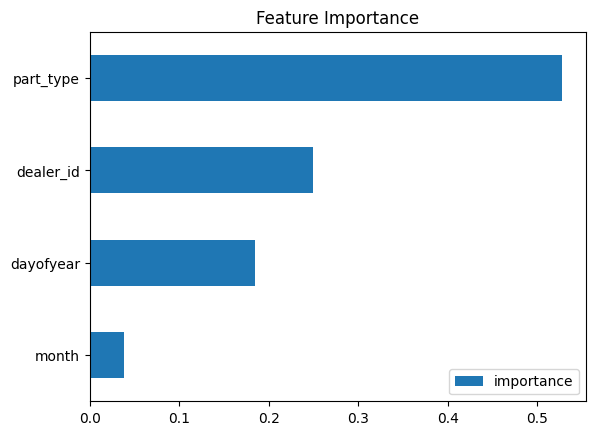

c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:617: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = df_part[[TARGET]].plot(figsize=(15,5))


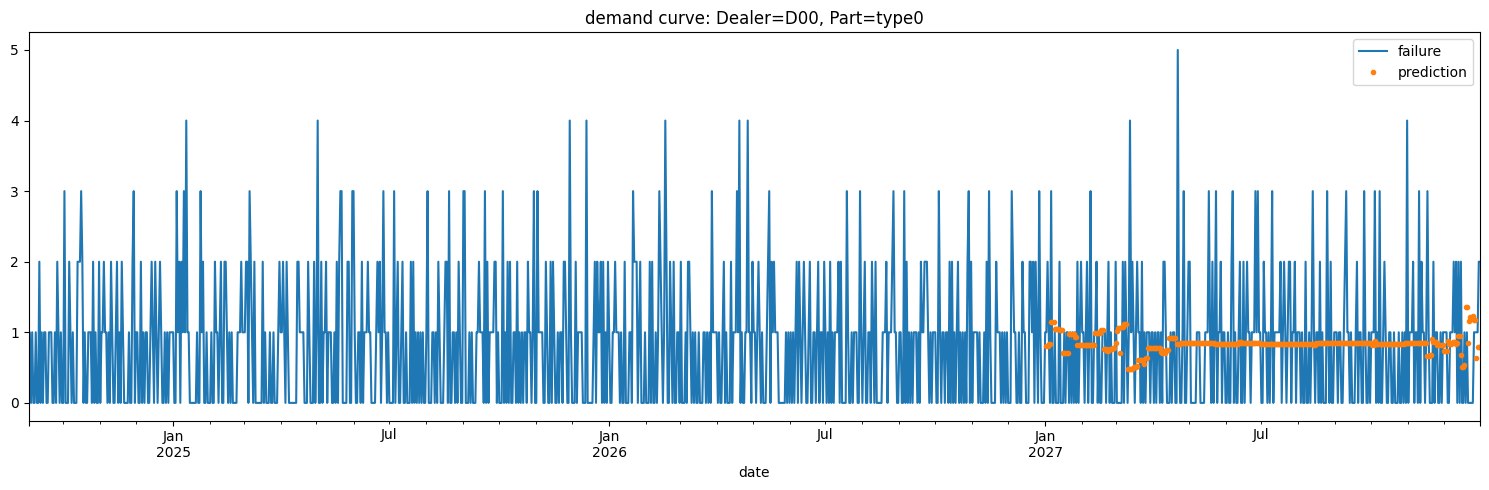

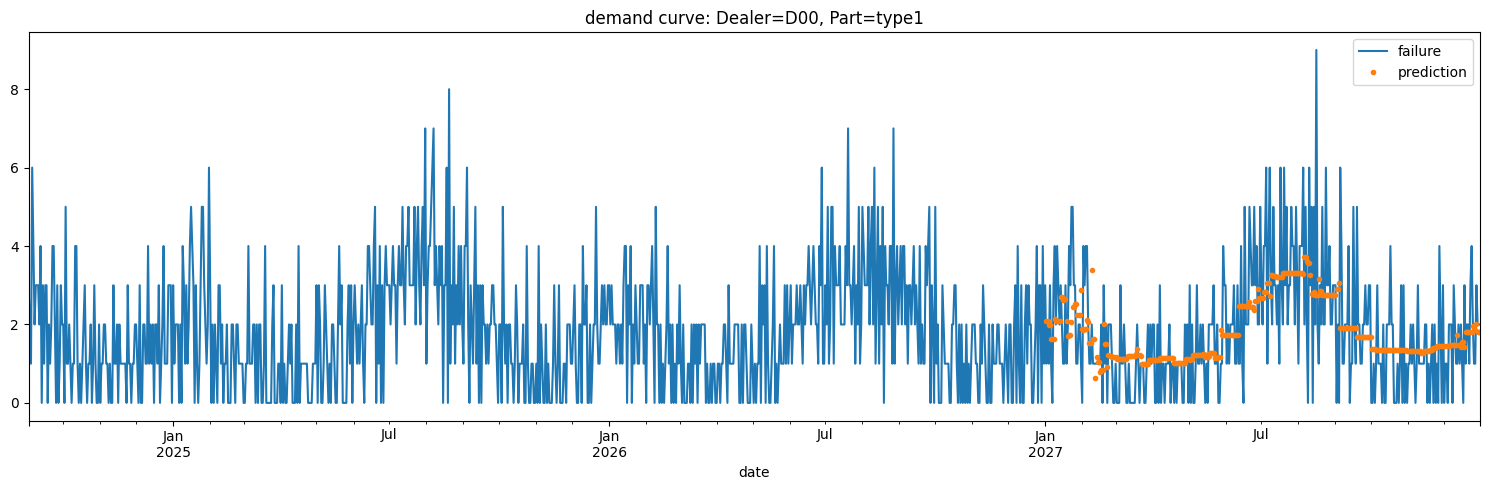

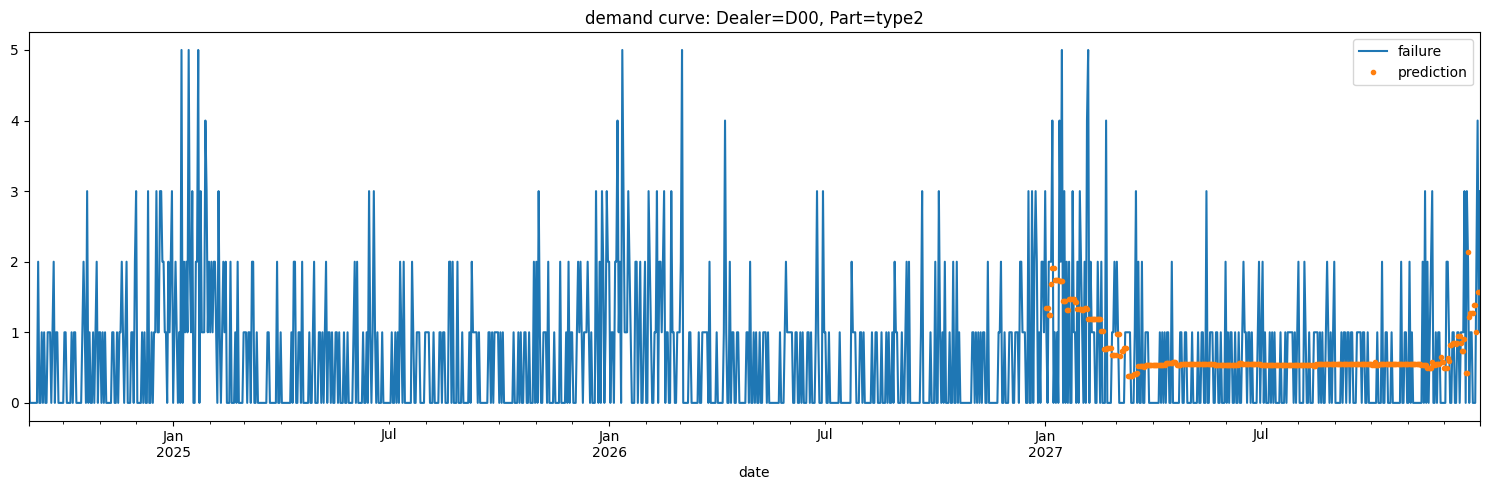

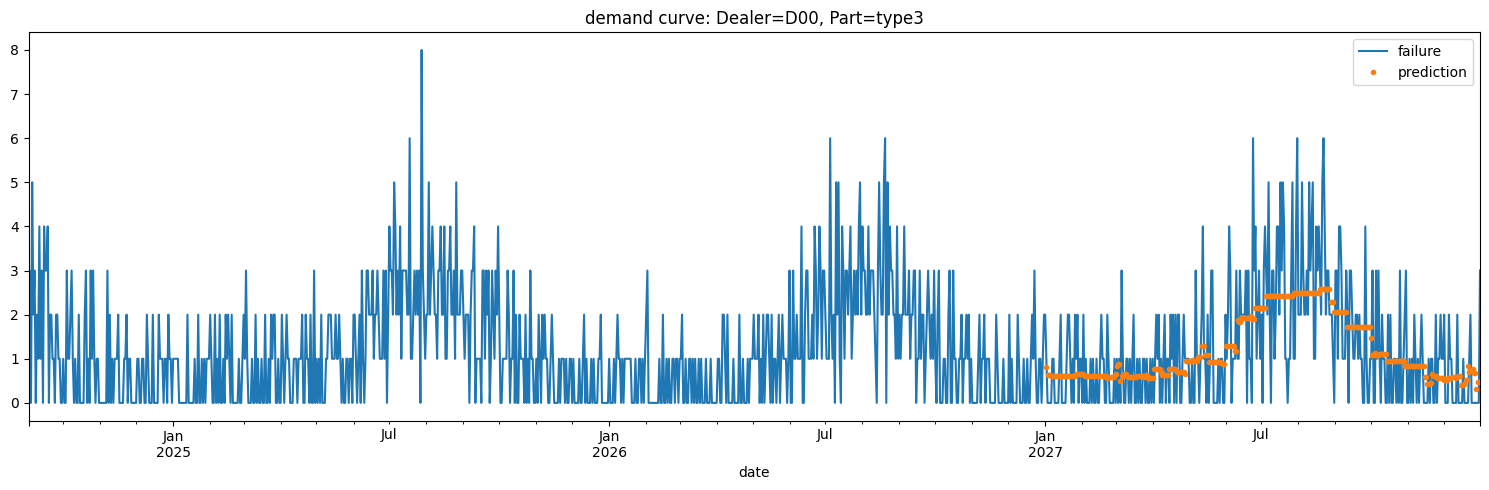

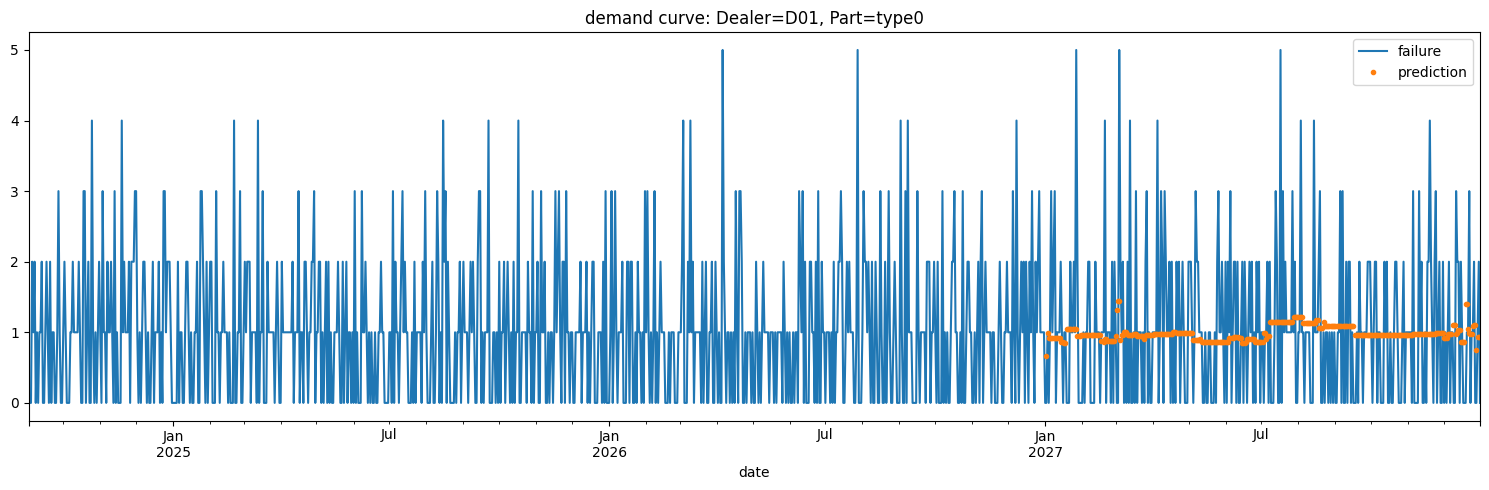

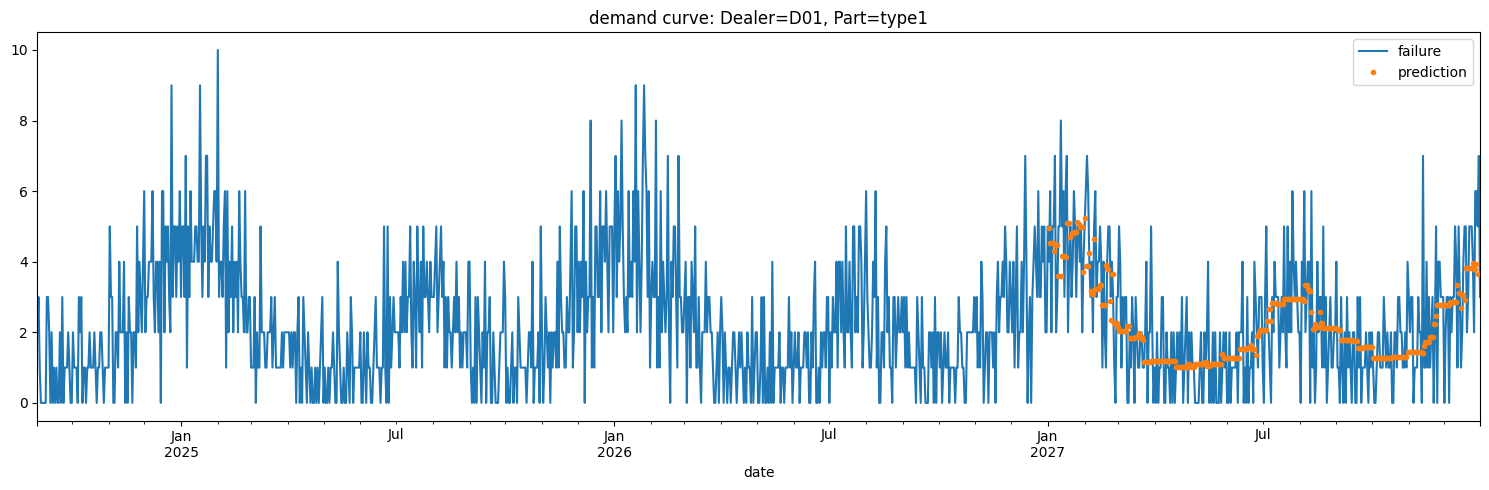

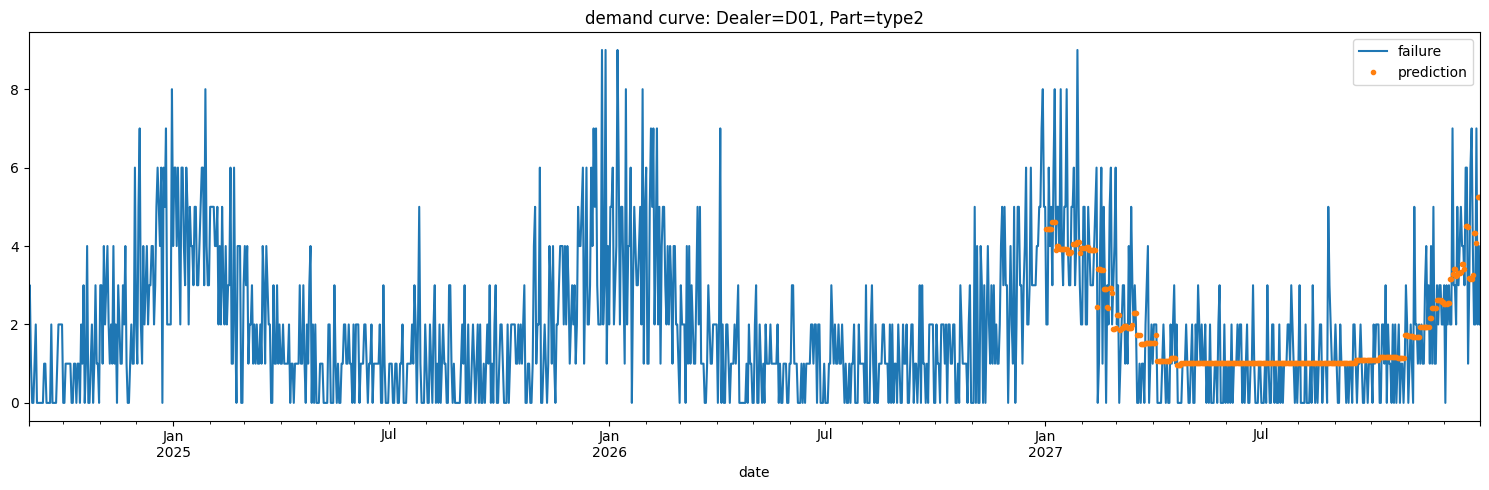

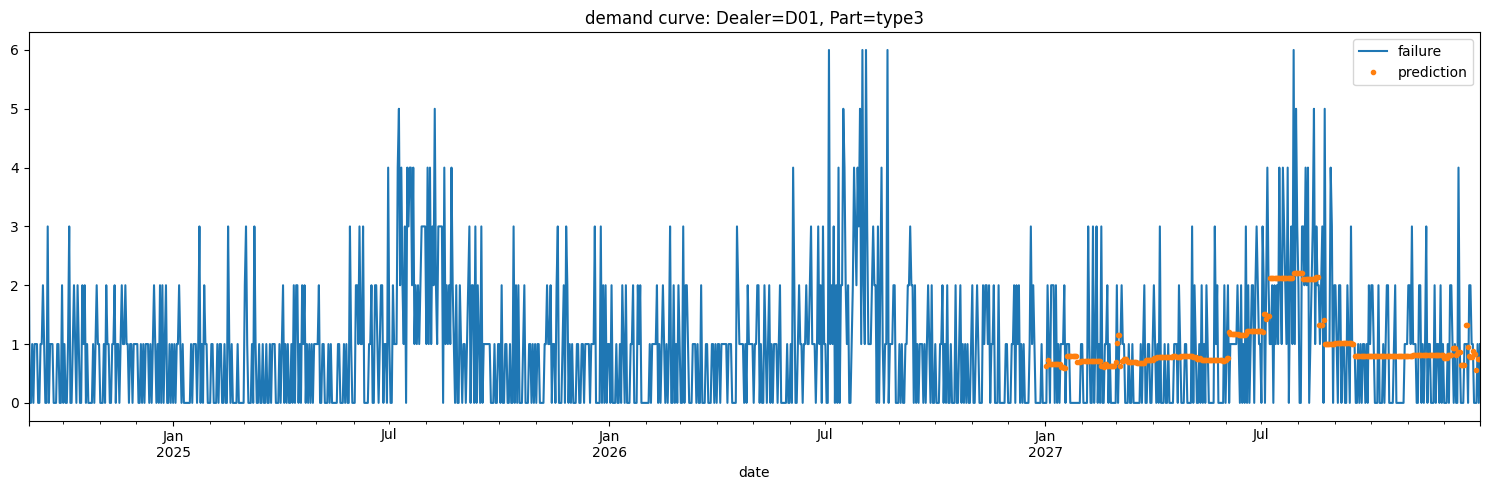

c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:606: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2   = r2_score(g['failure'], g['prediction'])
c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:415: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  #     else:


  dealer   part       MAE      RMSE        R2
0    D00  type0  0.706998  0.907950 -0.044117
1    D00  type1  0.987774  1.271802  0.293442
2    D00  type2  0.706852  0.869262  0.112035
3    D00  type3  0.856543  1.072404  0.353709
4    D01  type0  0.785835  1.030477  0.000652
5    D01  type1  1.089561  1.369336  0.384785
6    D01  type2  0.963611  1.293685  0.463115
7    D01  type3  0.799141  1.003891  0.188095


c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:427: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  # print(df_model["zero_failure"])
c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:453: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # result1: feature importance


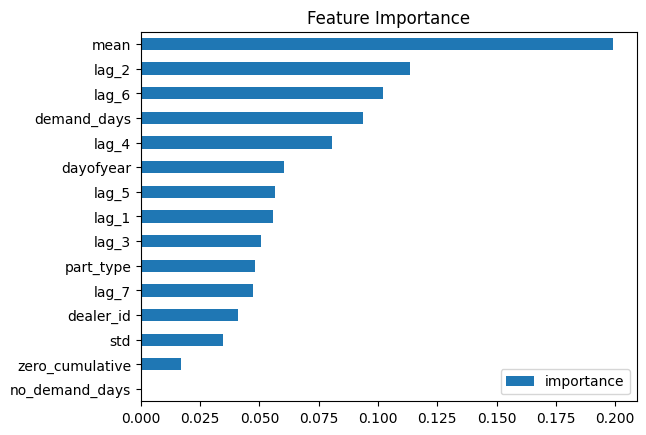

c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:617: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = df_part[[TARGET]].plot(figsize=(15,5))


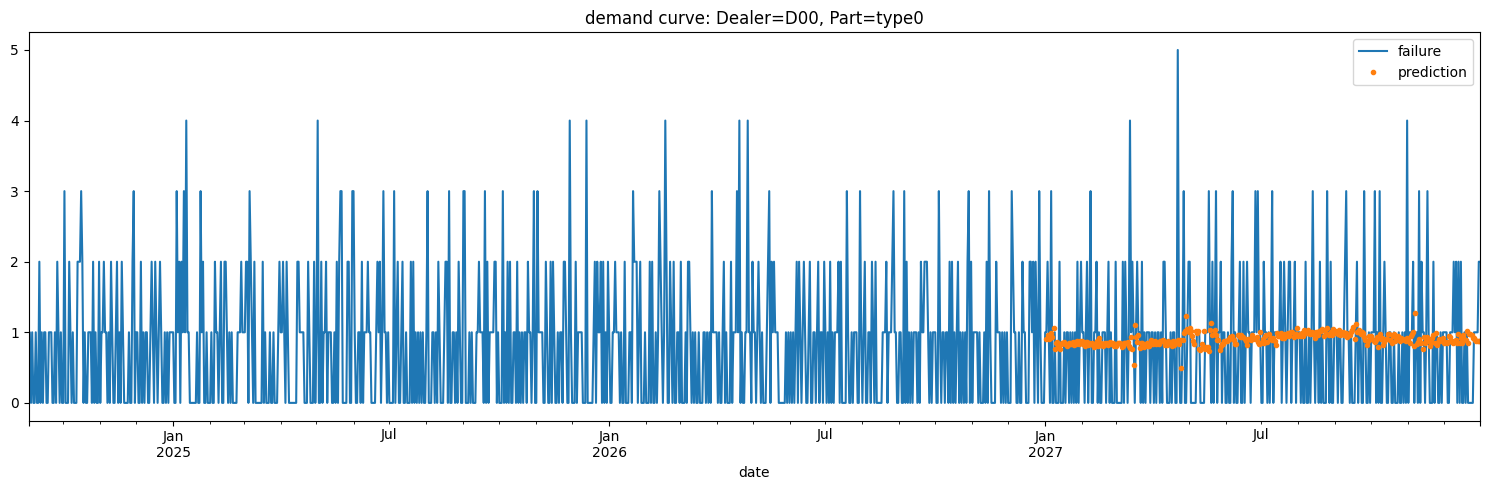

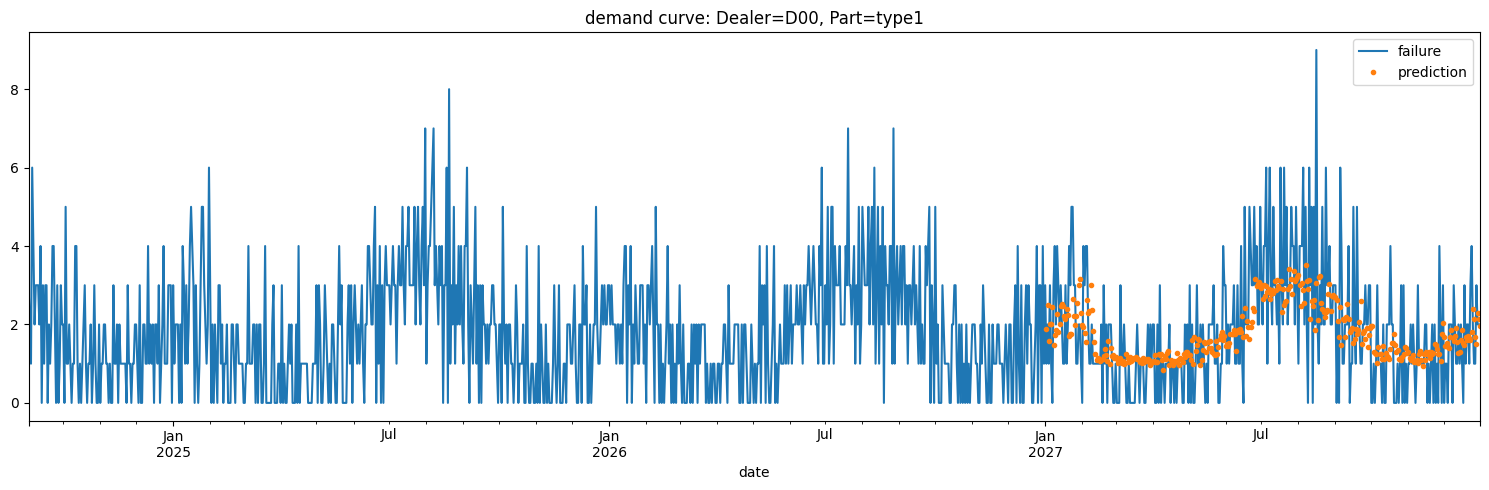

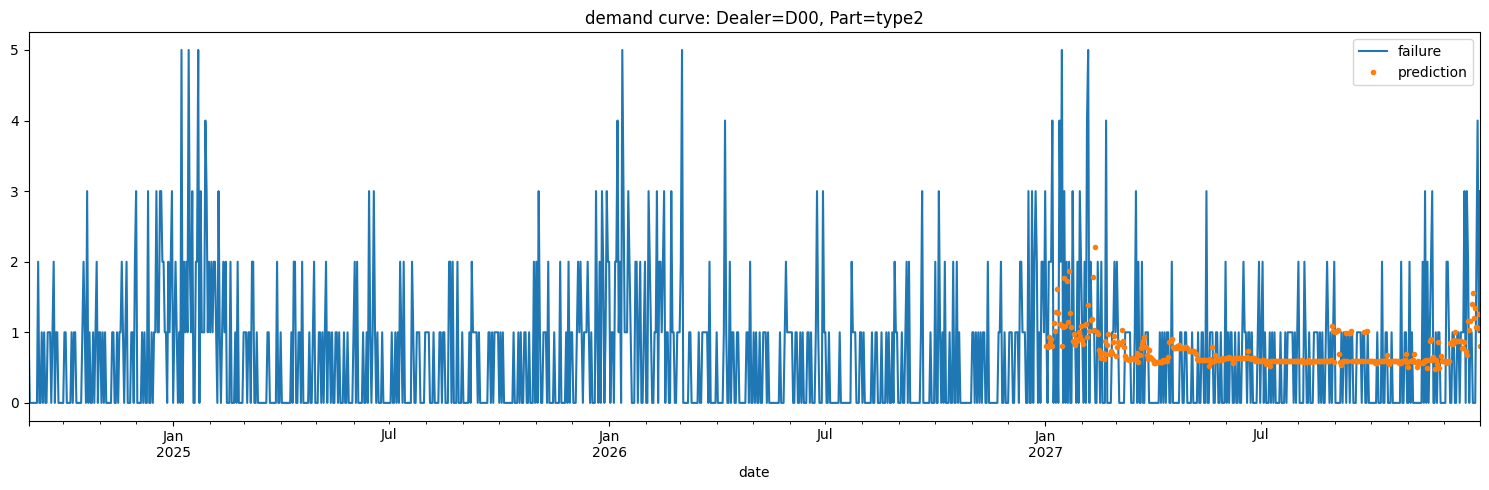

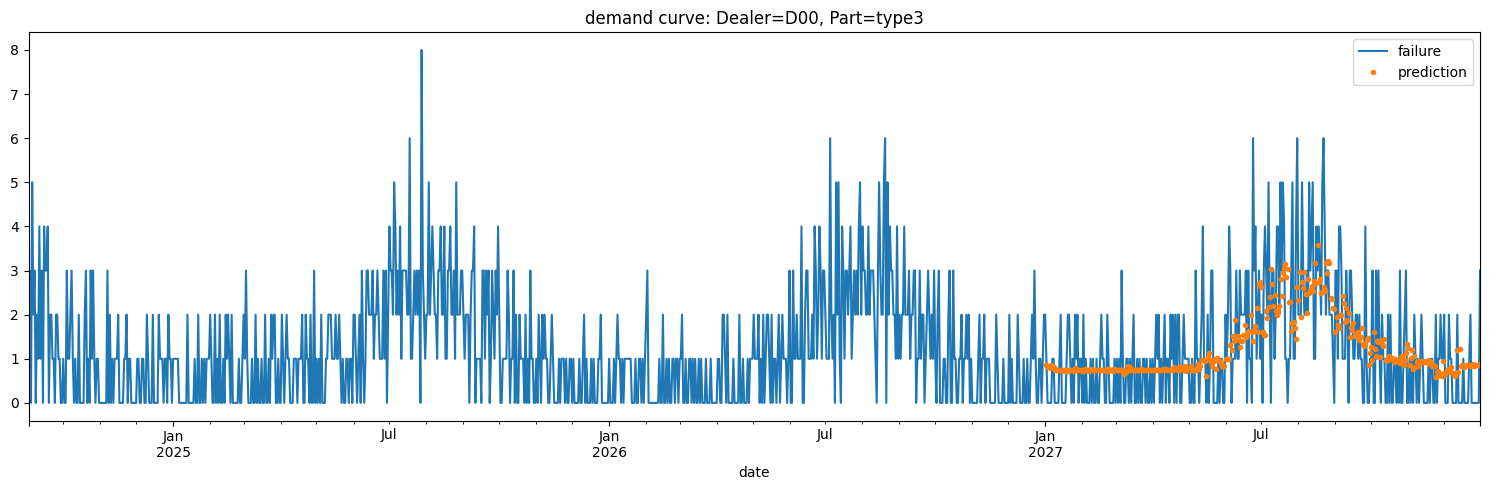

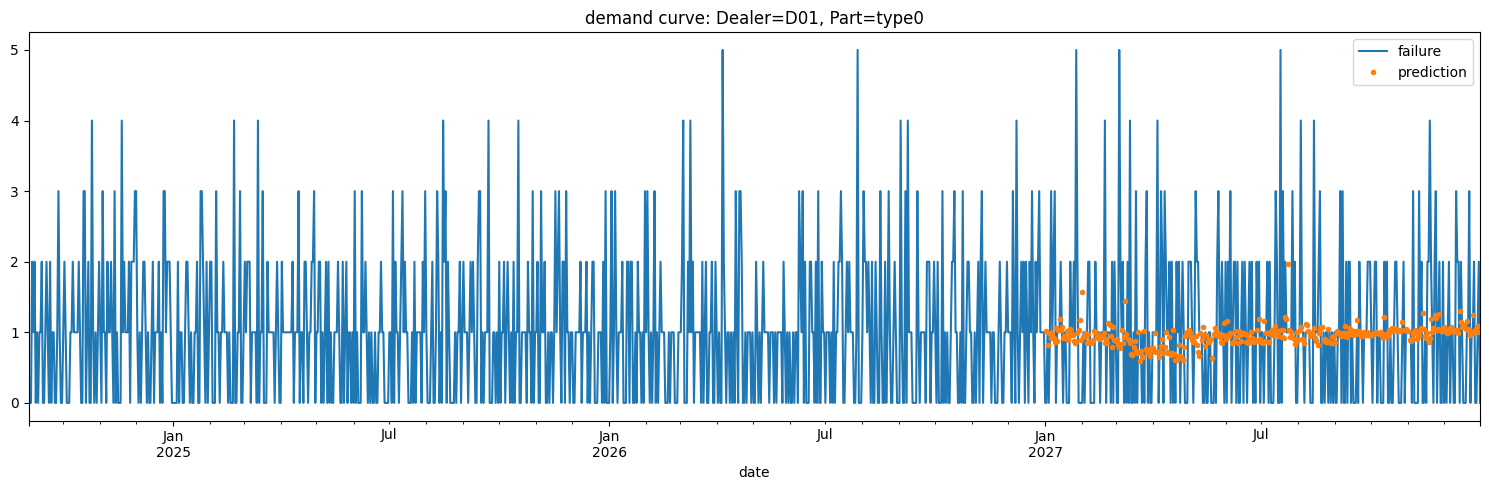

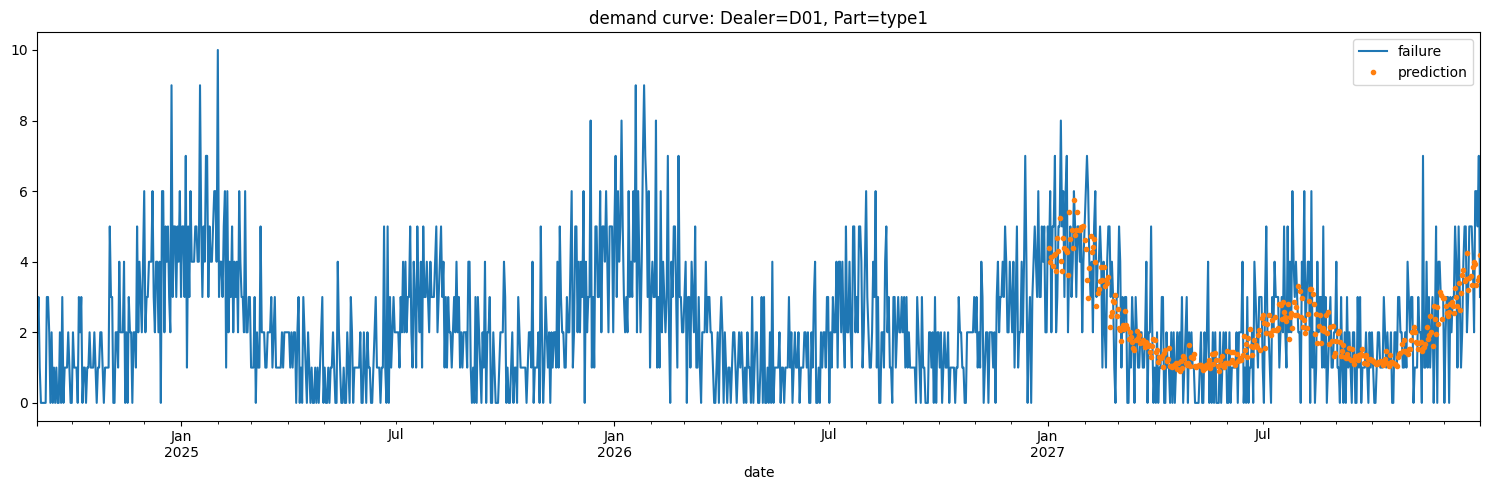

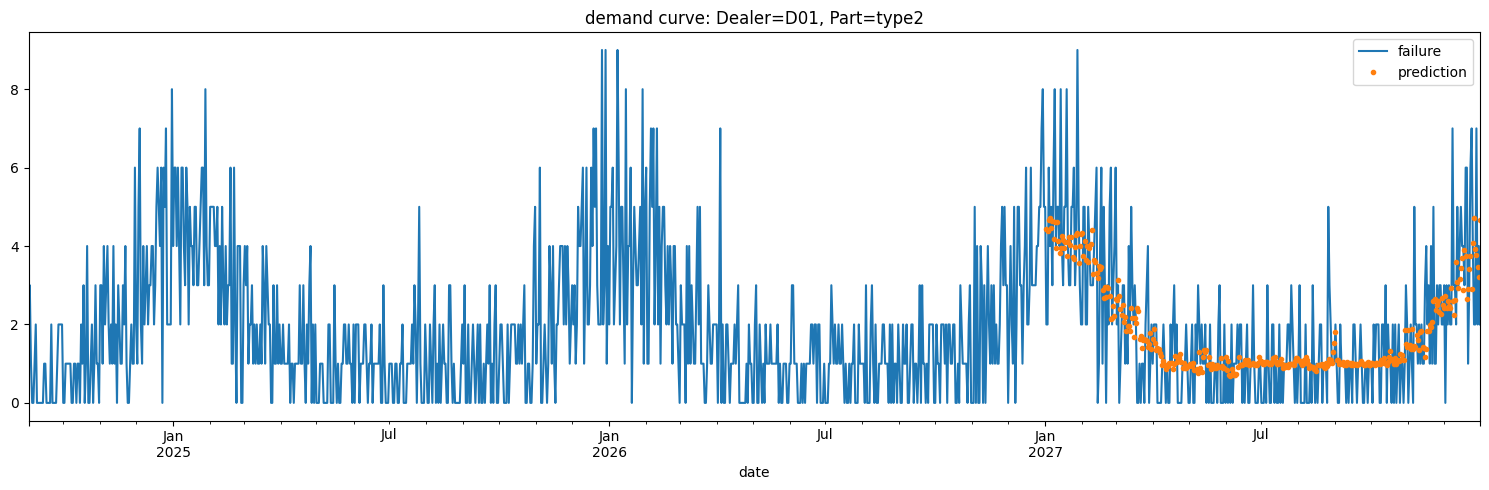

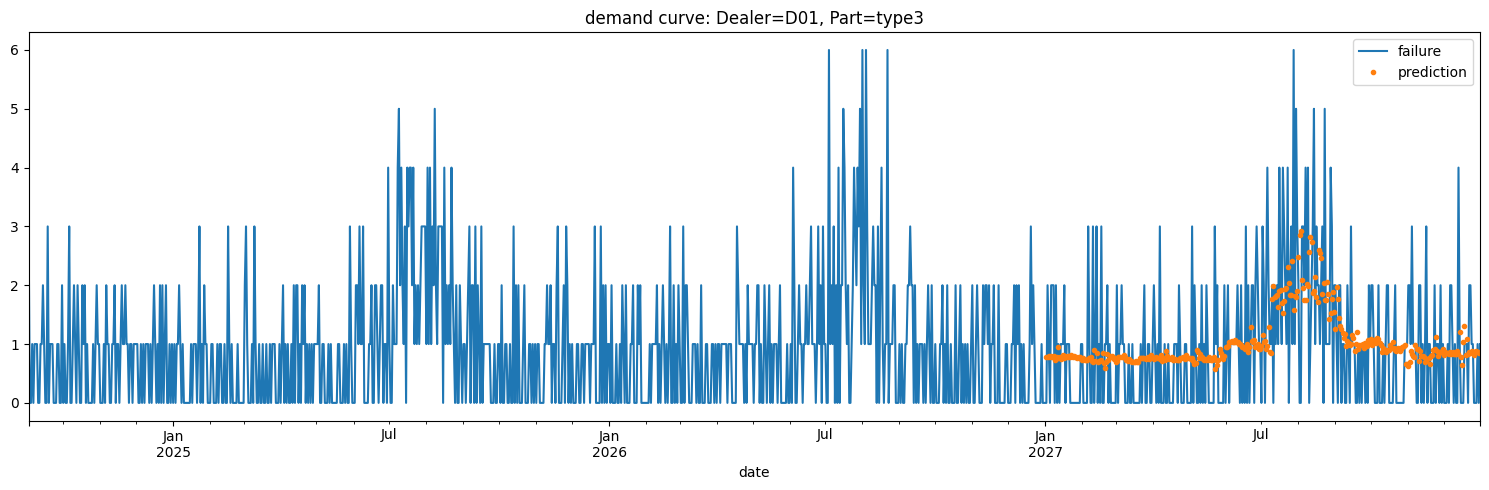

  dealer   part       MAE      RMSE        R2
0    D00  type0  0.678856  0.893430 -0.010990
1    D00  type1  1.001382  1.297815  0.264243
2    D00  type2  0.725793  0.909504  0.027918
3    D00  type3  0.894606  1.125134  0.288591
4    D01  type0  0.792897  1.046671 -0.031004
5    D01  type1  1.127810  1.404753  0.352550
6    D01  type2  0.988766  1.312088  0.447732
7    D01  type3  0.832703  1.050879  0.110312


c:\Users\sosou\PartDemand_Simulator\lib\XGBoost.py:606: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r2   = r2_score(g['failure'], g['prediction'])


In [835]:
# XGBoost
fname = "MLlearning_by_parttype_dealer.csv"
xgb = XGBoost(fname=fname)

# train/ test period
start_date = datetime.strptime('2025-01-01', '%Y-%m-%d')
train_period = start_date + timedelta(days=int(365*2))

# regression with time-based training (comprehensive data)
FEATURES = ['dayofyear', 'month', 'part_type', 'dealer_id']
TARGET = 'failure'
xgb.regression_comprehensive(start_date=start_date, train_period=train_period,
                             FEATURES=FEATURES, TARGET=TARGET)


# regression with statistical training (comprehensive data)
FEATURES = ['dayofyear', "mean", "std", "demand_days", 'no_demand_days', "zero_cumulative", 'part_type', 'dealer_id']
TARGET = 'failure'
xgb.regression_comprehensive(start_date=start_date, train_period=train_period,
                             FEATURES=FEATURES, TARGET=TARGET, w=90, n_lag=7)


# regression with time based training (comprehensive data)
# xgb.regression_time_based_training_comprehensive(train_period=train_period)

# regression with time based training (optional data)
# option
# options = [("D00", "type0"),
#             ("D00", "type1"),
#             ("D01", "type2"),
#             ("D01", "type3")]
# xgb.regression_time_based_training_optional(train_period=train_period, 
#                                             options=options)

# regression
# xgb.regression_train_predict_foreach()


c:\Users\sosou\PartDemand_Simulator\lib\RandomForest.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = rf.predict(X_test)


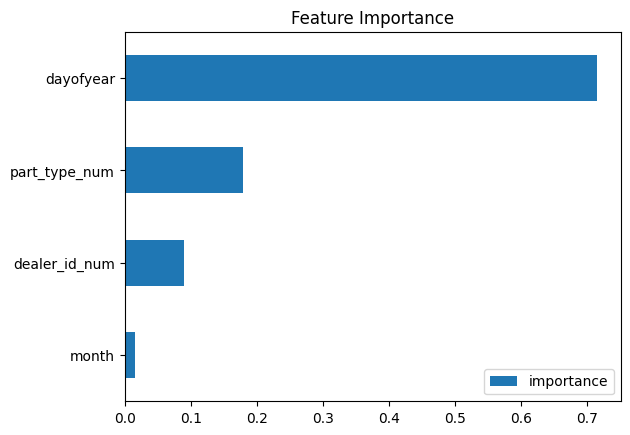

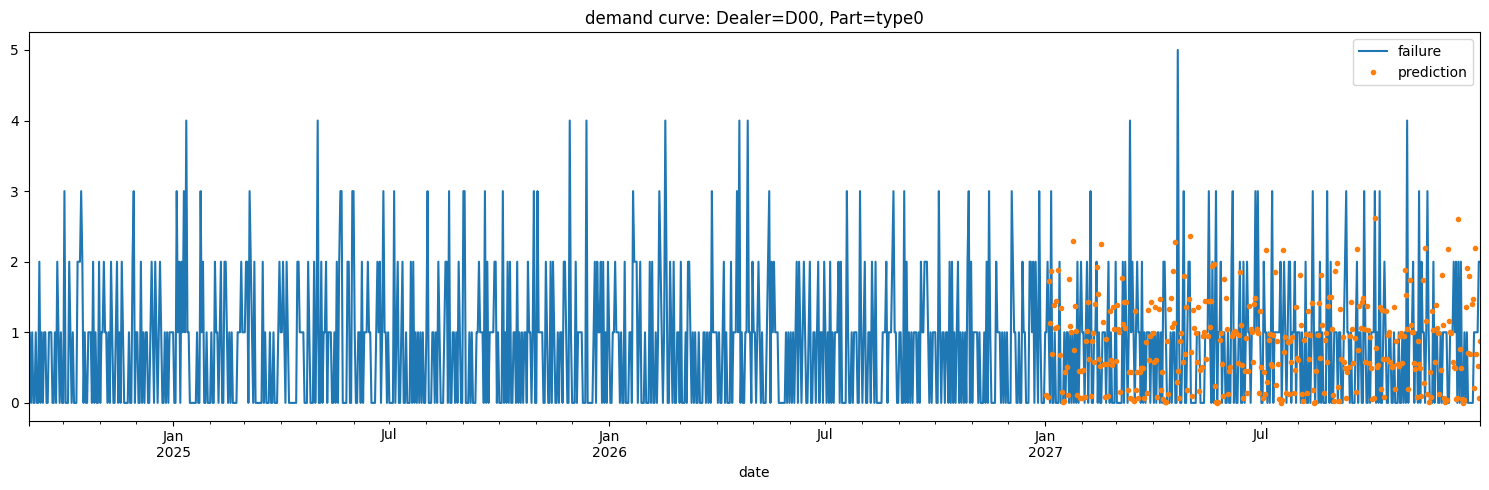

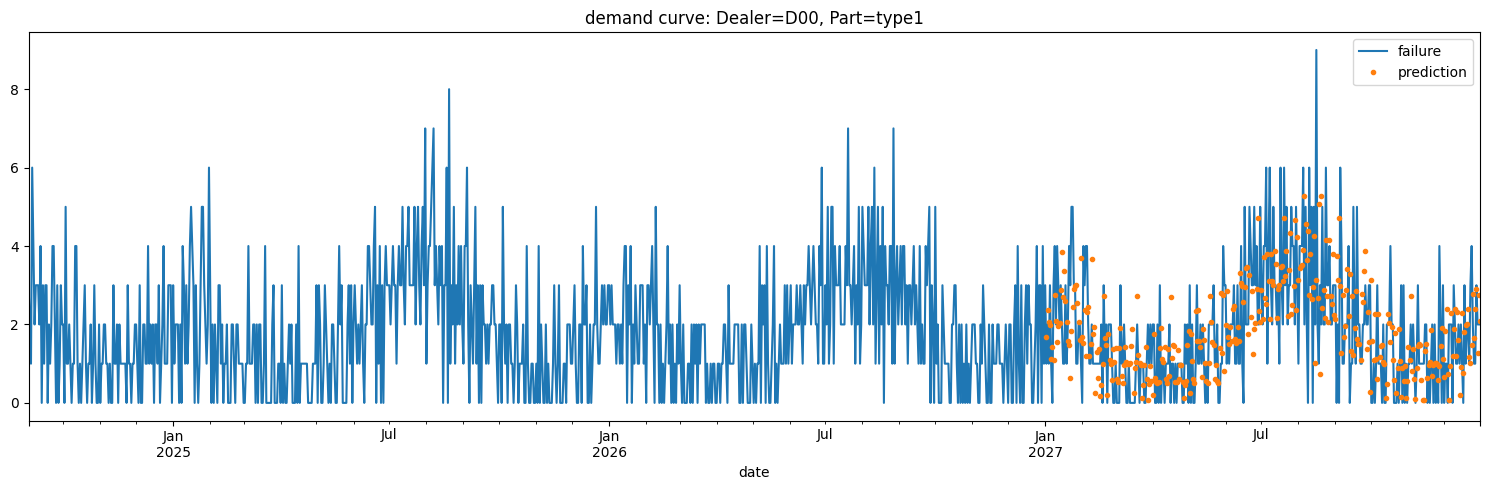

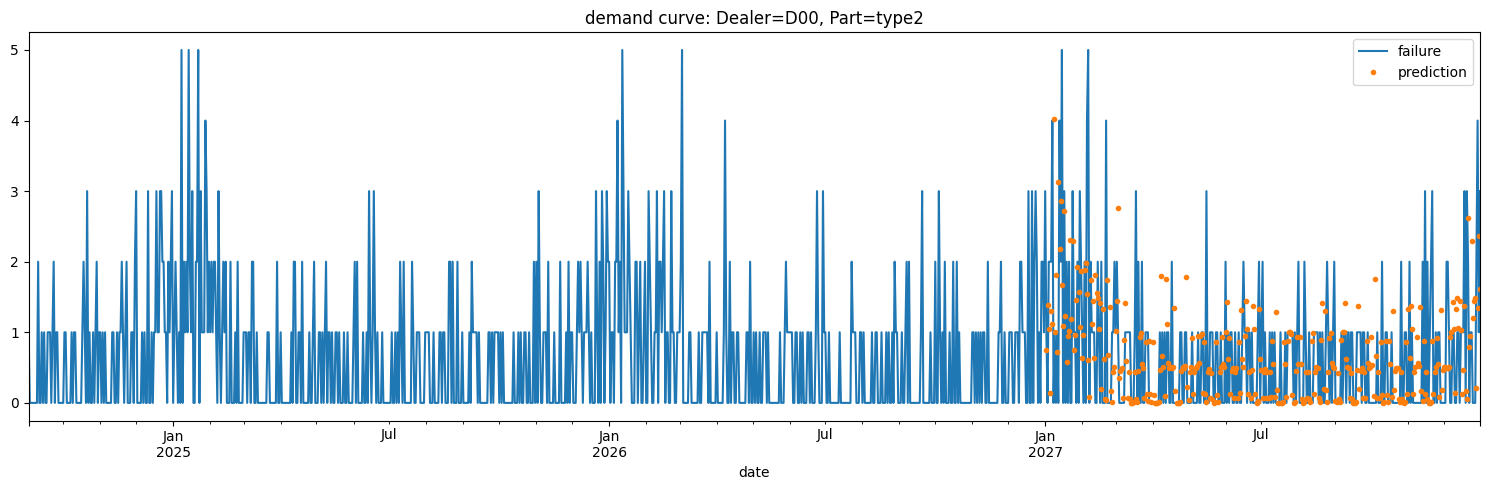

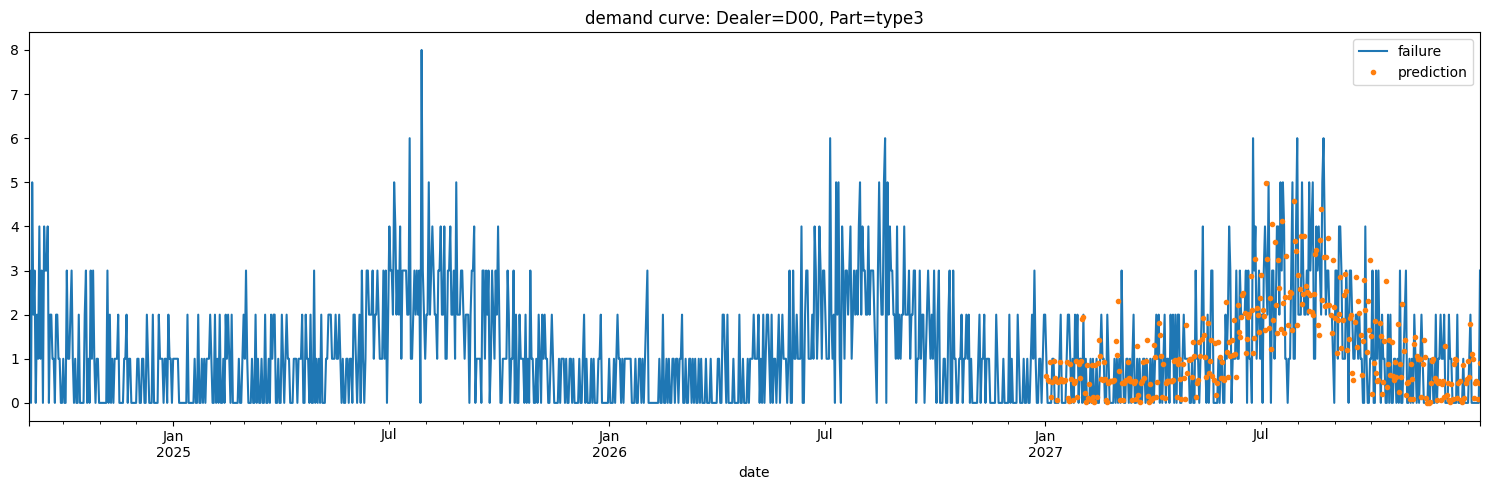

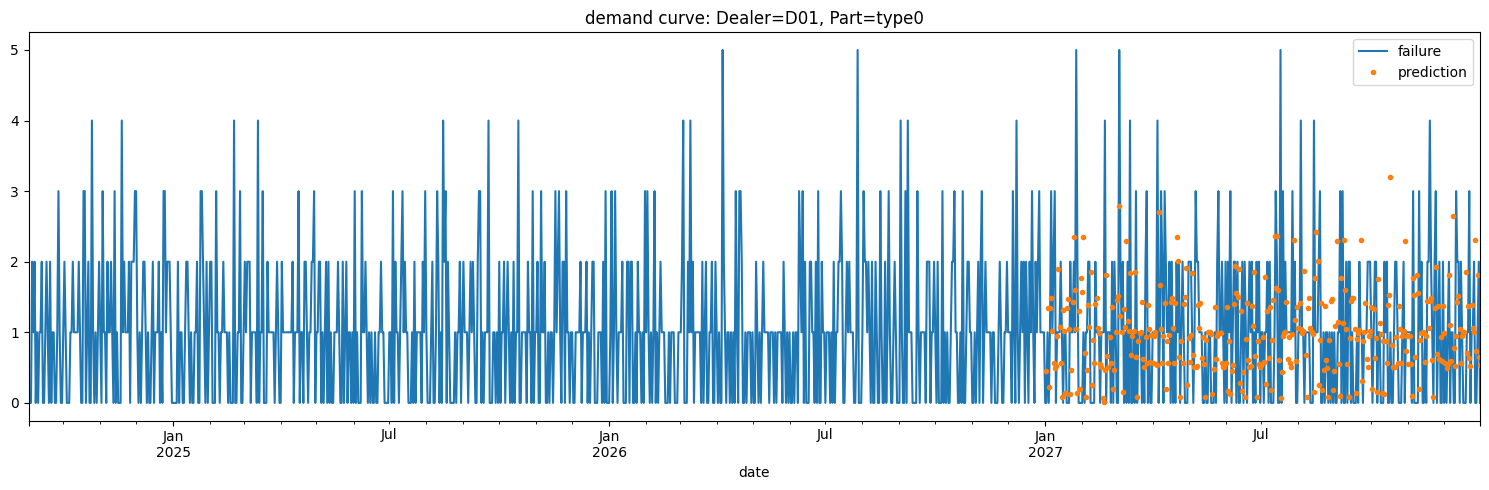

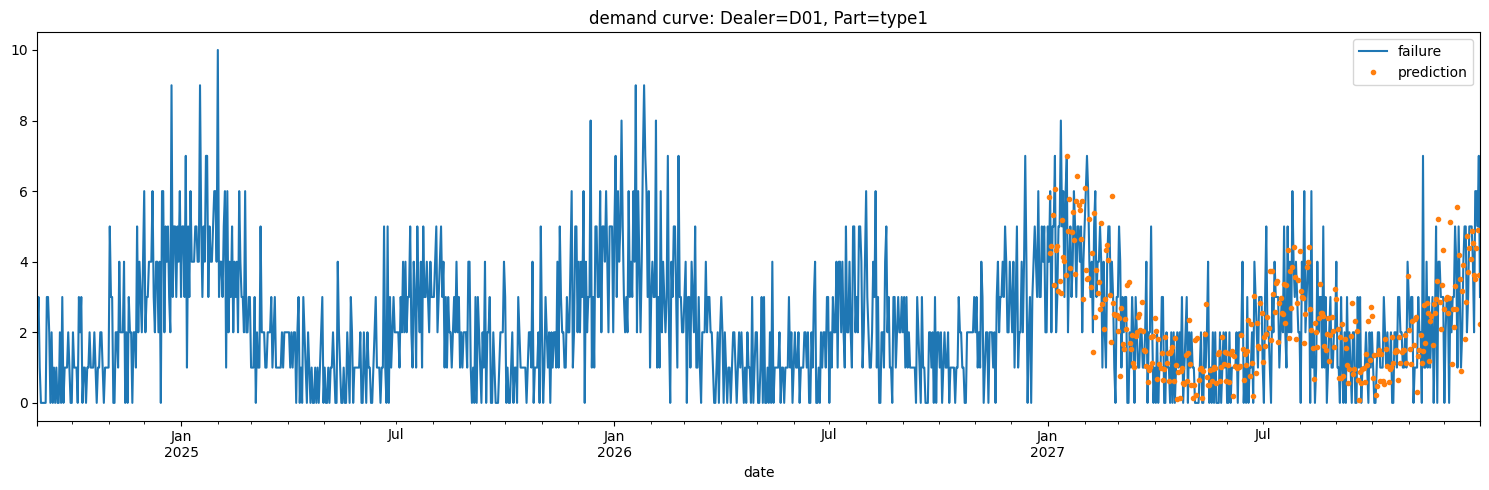

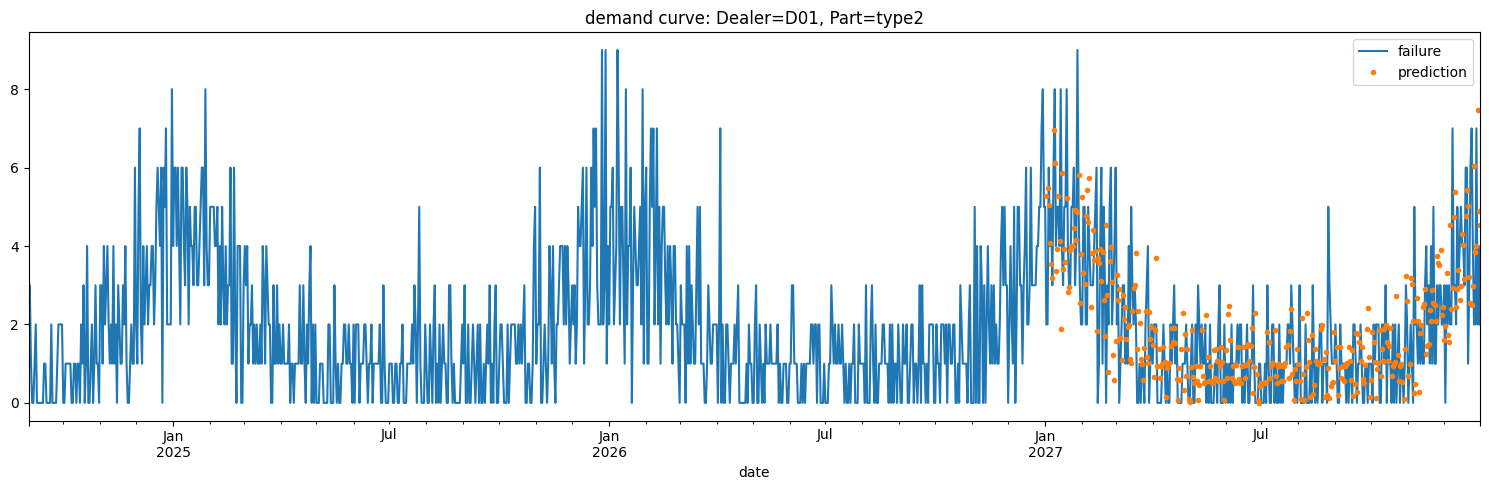

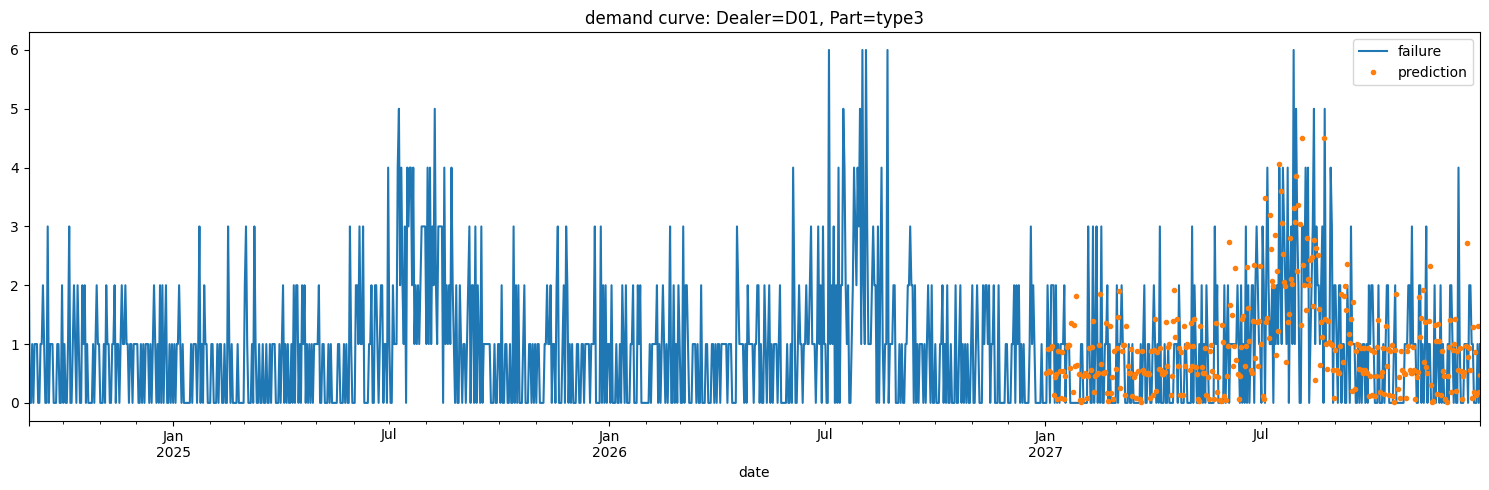

  dealer   part       MAE      RMSE        R2
0    D00  type0  0.871079  1.092966 -0.512998
1    D00  type1  1.103625  1.451427  0.079764
2    D00  type2  0.723775  1.016917 -0.215247
3    D00  type3  0.975278  1.279349  0.080210
4    D01  type0  0.924250  1.190999 -0.334945
5    D01  type1  1.213430  1.528560  0.233395
6    D01  type2  1.143861  1.532450  0.246650
7    D01  type3  0.860555  1.127737 -0.024584


c:\Users\sosou\PartDemand_Simulator\lib\RandomForest.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = rf.predict(X_test)


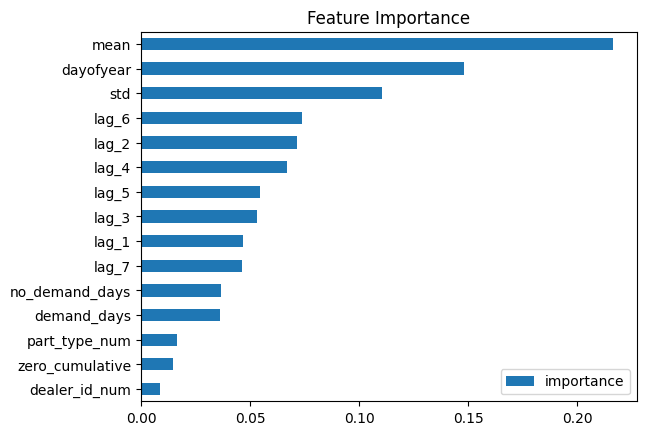

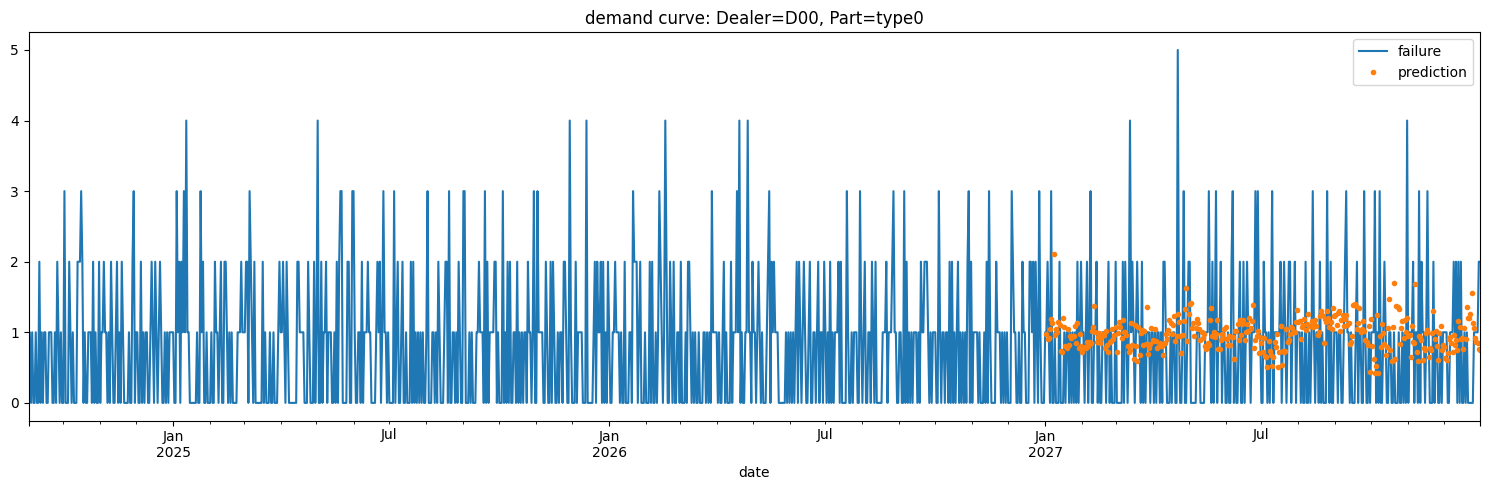

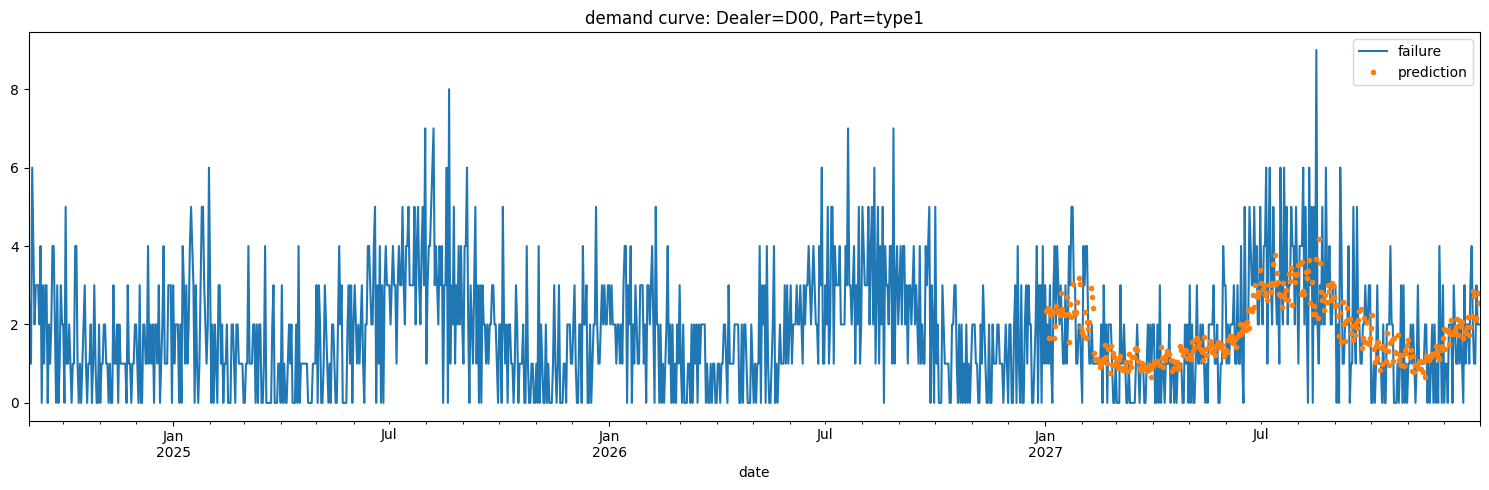

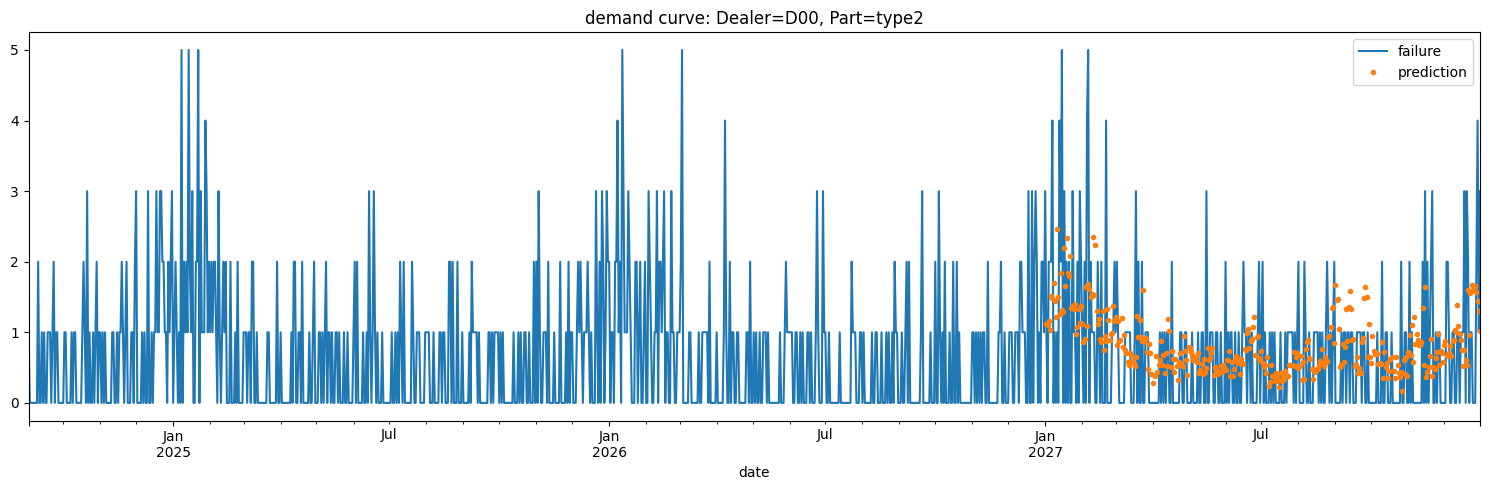

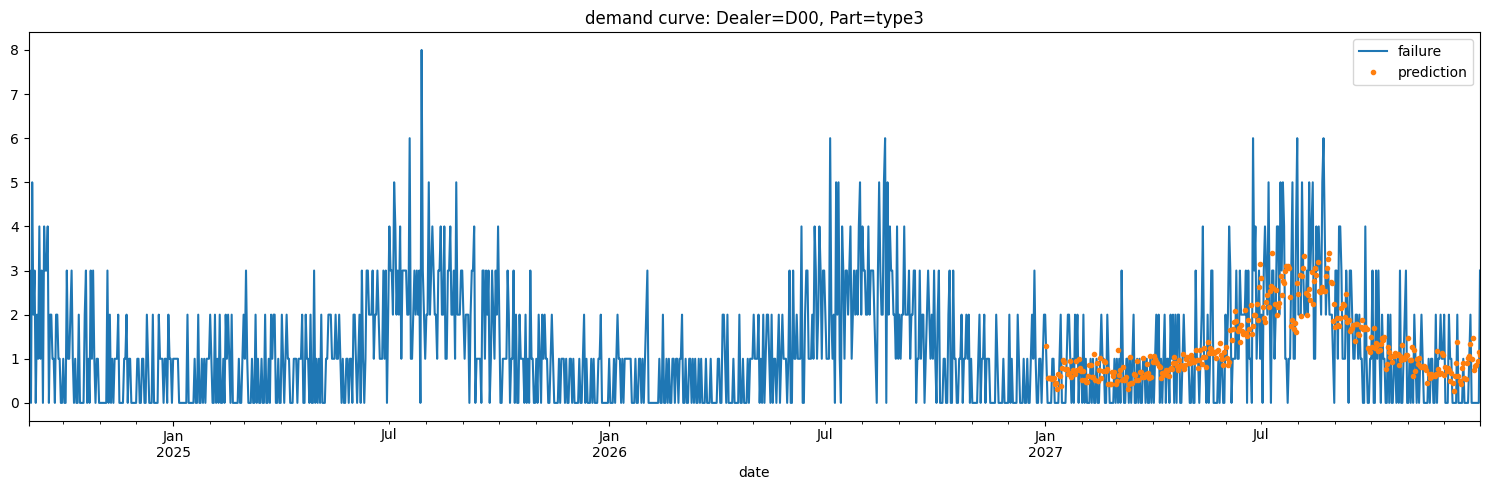

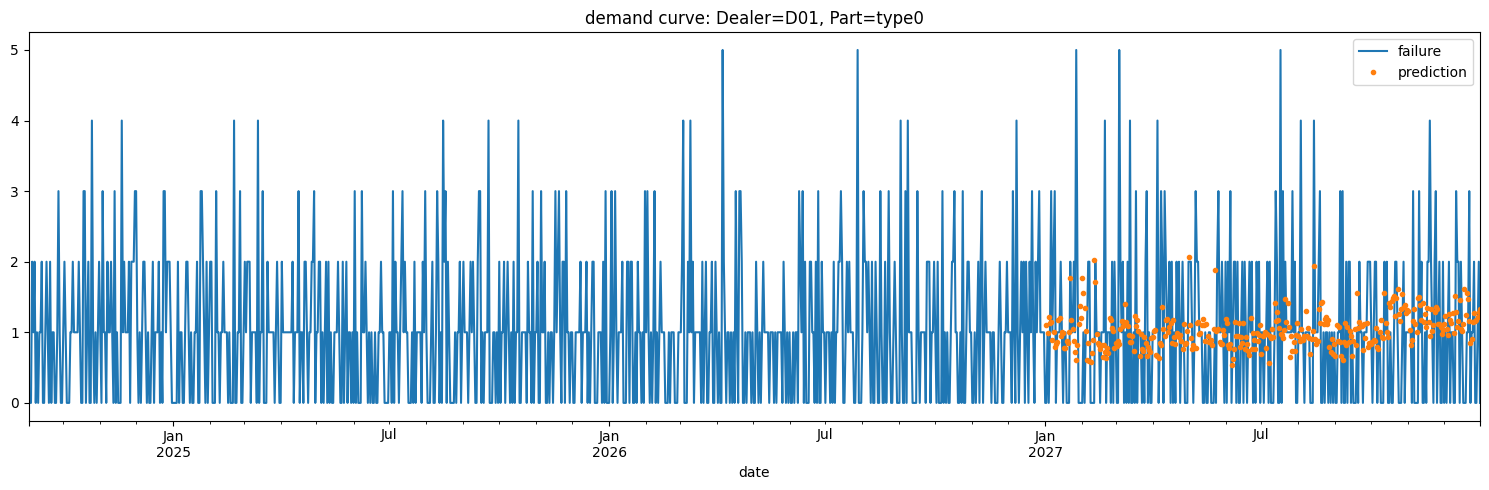

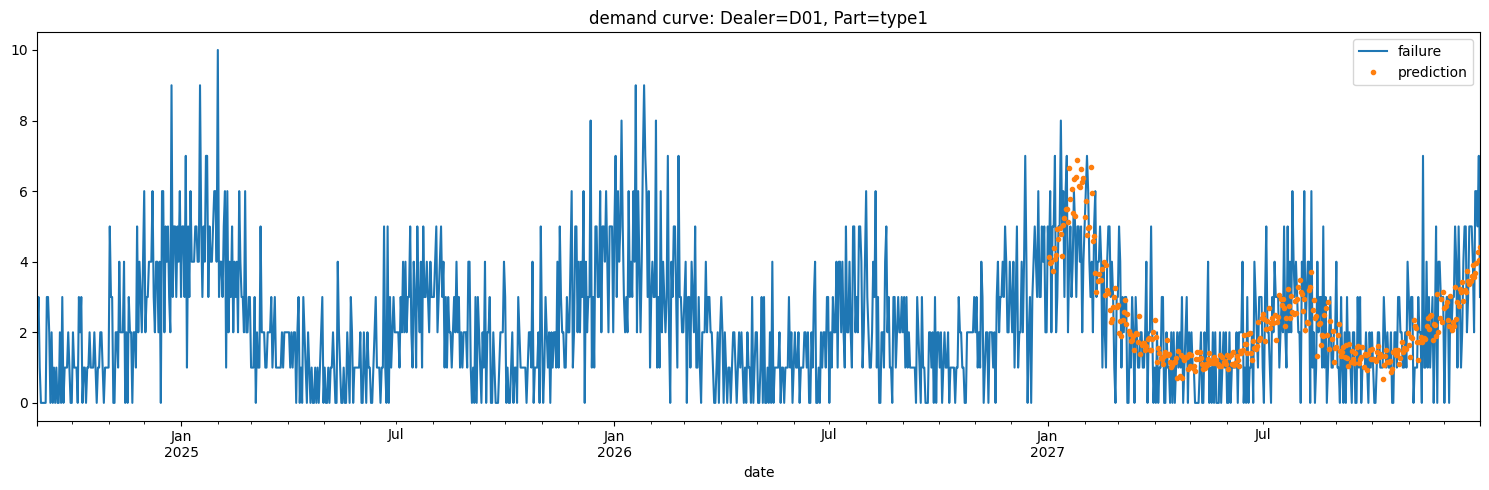

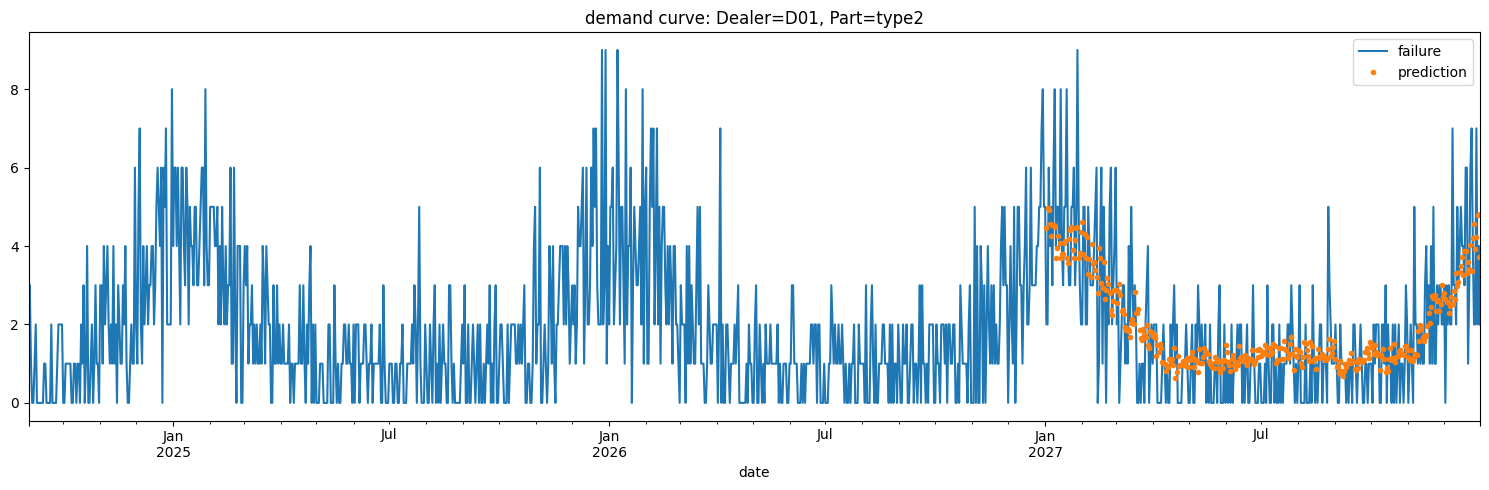

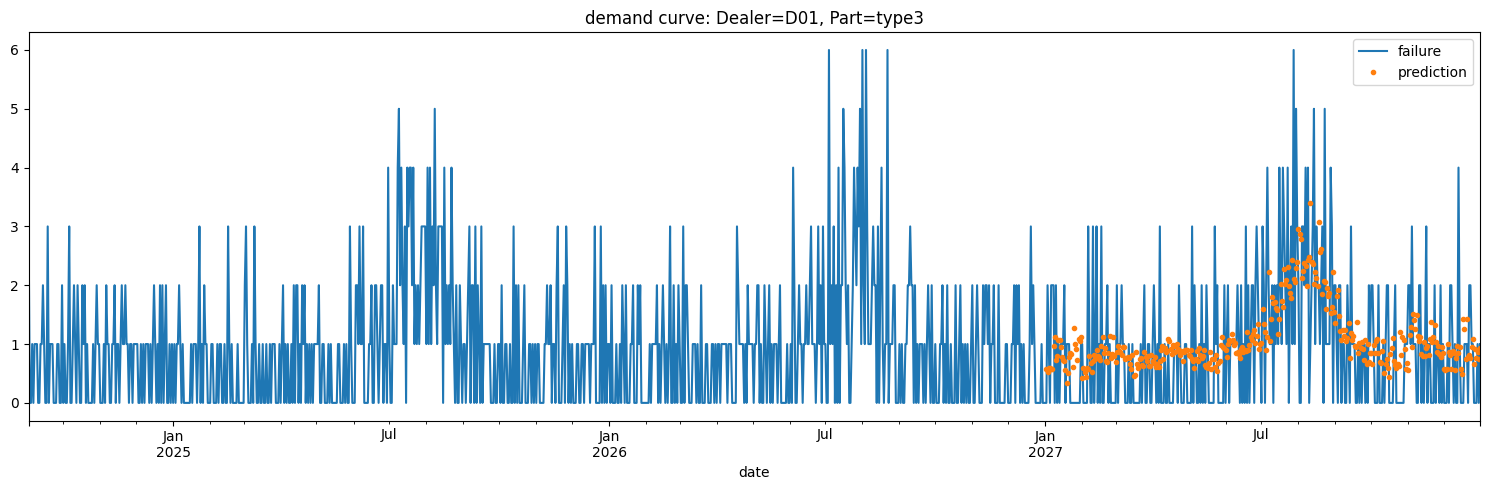

  dealer   part       MAE      RMSE        R2
0    D00  type0  0.726681  0.926111 -0.086305
1    D00  type1  1.000183  1.285416  0.278234
2    D00  type2  0.750176  0.935054 -0.027466
3    D00  type3  0.877415  1.109112  0.308709
4    D01  type0  0.823416  1.066838 -0.071117
5    D01  type1  1.175912  1.457456  0.303057
6    D01  type2  1.006556  1.312330  0.447528
7    D01  type3  0.829113  1.043255  0.123175


In [836]:
# Random Forest
fname = "MLlearning_by_parttype_dealer.csv"
rf = RForest(fname=fname)

# train/ test period
start_date = datetime.strptime('2025-01-01', '%Y-%m-%d')
train_period = start_date + timedelta(days=int(365*2))

# regression with time-based training (comprehensive data)
FEATURES = ['dayofyear', 'month', 'part_type_num', 'dealer_id_num']
TARGET = 'failure'
rf.regression_comprehensive(start_date=start_date, train_period=train_period,
                             FEATURES=FEATURES, TARGET=TARGET)


# regression with statistical training (comprehensive data)
FEATURES = ['dayofyear', "mean", "std", "demand_days", 'no_demand_days', "zero_cumulative", 'part_type_num', 'dealer_id_num']
TARGET = 'failure'
rf.regression_comprehensive(start_date=start_date, train_period=train_period,
                             FEATURES=FEATURES, TARGET=TARGET, w=90, n_lag=7)

In [837]:

# # train/ test period
# start_date = datetime.strptime('2025-01-01', '%Y-%m-%d')
# train_period = start_date + timedelta(days=int(365*2))

# # regression with time-based training (comprehensive data)
# FEATURES = ['dayofyear', 'month', 'part_type', 'dealer_id']
# TARGET = 'failure'
# xgb.classification_comprehensive(start_date=start_date, train_period=train_period,
#                              FEATURES=FEATURES, TARGET=TARGET)


# # regression with statistical training (comprehensive data)
# FEATURES = ['dayofyear', "mean", "demand_days", 'no_demand_days', "zero_cumulative", 'part_type', 'dealer_id']
# TARGET = 'failure'
# xgb.classification_comprehensive(start_date=start_date, train_period=train_period,
#                              FEATURES=FEATURES, TARGET=TARGET, w=30, n_lag=3)

In [838]:
# classification
# xgb.classification_train_predict_foreach()

In [839]:
# # Statistic Analysis before Machine Learning
# fname = "MLlearning_by_parttype_dealer.csv"
# stat = StatisticAnalysis(fname=fname, sim_failure=sim.dealer_failure_model)

# # visualization
# stat.visualization()


